Aircaft rating for long-haul flights.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

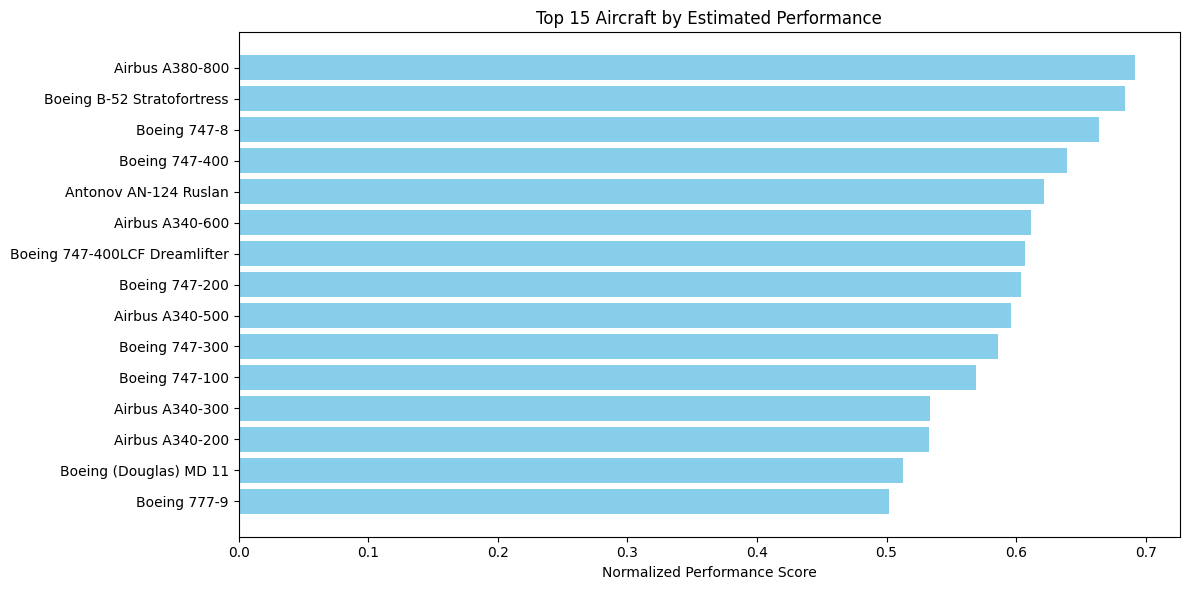

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/drive/MyDrive/Aircraft Analysis/aircraft_data.xlsx"
df = pd.read_excel(file_path, sheet_name="ACD_Data")

# Select relevant columns for performance
performance_cols = ['Model_FAA', 'Approach_Speed_knot', 'MTOW_lb', 'Num_Engines']
performance_df = df[performance_cols].dropna()

# Normalize performance metrics
normalized_df = performance_df.copy()
for col in ['Approach_Speed_knot', 'MTOW_lb', 'Num_Engines']:
    normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())

# Compute a composite performance score
normalized_df['Performance_Score'] = normalized_df[['Approach_Speed_knot', 'MTOW_lb', 'Num_Engines']].mean(axis=1)

# Top 15 aircraft by performance
top_performers = normalized_df.sort_values(by='Performance_Score', ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_performers['Model_FAA'], top_performers['Performance_Score'], color='skyblue')
plt.xlabel("Normalized Performance Score")
plt.title("Top 15 Aircraft by Estimated Performance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
